<a href="https://colab.research.google.com/github/machine-perception-robotics-group/ImageProcessingGoogleColabNotebooks/blob/master/02_spatial_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. 空間フィルタリング

講義で説明する画像処理の方法について，google colaboratoryを利用して演習する．
google colaboratoryは，クラウドで実行する Jupyter ノートブック環境である.
google coraboratoryについては，[ここ](https://www.tdi.co.jp/miso/google-colaboratory-gpu)や[ここ](https://www.codexa.net/how-to-use-google-colaboratory/)を参考にすること．

下記のプログラムを実行すると，フィルタによる画像の平滑化およびエッジの抽出，画像の先鋭化を行う．

## 準備
プログラムの動作に必要なデータをダウンロードし，zipファイルを解凍する．
`!`で始まるコマンドはPythonではなく，Linux（Ubuntu）のコマンドを実行している．

In [1]:
!wget -q http://www.mprg.cs.chubu.ac.jp/Tutorial/ML_Lecture/tutorial_ip_2020/image1.zip
!unzip -q image1.zip
!ls
!ls ./image1/

replace image1/168065B.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
image1	image1.zip  image1.zip.1  sample_data
168065B.JPG	 Blackboard3.jpg  woman-color.jpg  woman-n.jpg
Blackboard1.jpg  coin.png	  woman-g2.jpg	   woman-s.jpg
Blackboard2.jpg  ipod.png	  woman-g.jpg	   woman-t.jpg


## 画像の読み込みと表示
画像の読み込みには，OpenCVという画像処理・画像認識のライブラリを利用する．
OpenCVをpythonで利用する場合は，`cv2`というパッケージをインポートする．

`imread`関数で画像の読み込み，`cvtColor`でカラー画像のチャネルの順番をBGRからRGBに変換している．この処理の詳細は割愛する．

そして，`matplotlib`という描画するパッケージの`imshow`関数を利用して画像を表示する．

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

まずはじめに，

1. ノイズ無し画像
2. ごま塩ノイズが含まれた画像
3. スパイクノイズが含まれた画像

を読み込み表示する．

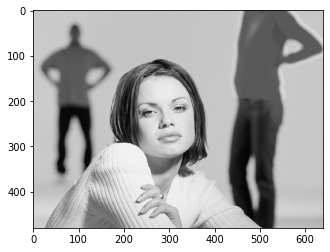

In [20]:
# グレースケール画像（ノイズ無し画像）
img1 = cv2.imread('./image1/woman-g.jpg', 2)
plt.imshow(img1, cmap = "gray")

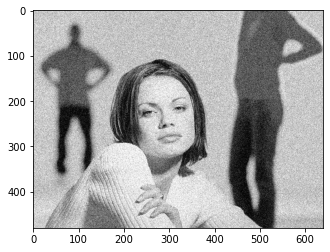

In [21]:
# グレースケール画像（ごま塩ノイズが含まれた画像）
img2 = cv2.imread('./image1/woman-n.jpg', 2)
plt.imshow(img2, cmap = "gray")

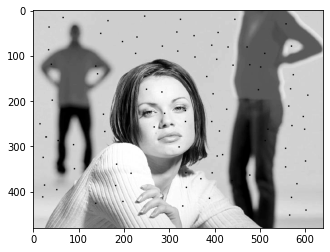

In [22]:
# グレースケール画像（スパイクノイズが含まれた画像）
img3 = cv2.imread('./image1/woman-s.jpg', 2)
plt.imshow(img3, cmap = "gray")

## フィルタによる画像の平滑化

ここでは，いくつかのフィルタを用いて画像の平滑化を行う．







### 移動平均フィルタ

移動平均フィルタでは．注目画素を中心とする画像の局所領域の平均値を算出し，注目画素の値を置き換えることで，画像の平滑化を行う．

まず，移動平均フィルタを計算する際のフィルタ（カーネル）サイズ`kernel_size`を指定し，フィルタ`kernel`を作成する．
この時，フィルタの要素の合計が1となるようにフィルタサイズに応じて要素の値を除算する．

その後，フィルタ処理後の画像を保存するための配列`img_MA`を準備する．
また，カーネルサイズと画像サイズから，フィルタ処理を行う画像の範囲を計算する．

フィルタ処理の準備ができた後は，for文を用いて任意の範囲の画素値を合計し，その平均値を計算して，配列`img_MA`の対応する箇所に値を代入することでフィルタ処理を行う．

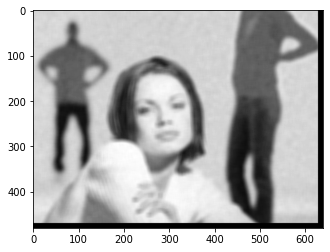

In [24]:
# ごま塩ノイズ画像をコピーして，画像の高さ・幅を取得
img = img2.copy()
height, width = img.shape

# フィルタサイズを指定
kernel_size = 11

# フィルタを作成
kernel = np.ones([kernel_size, kernel_size], dtype=np.float32) / kernel_size**2

# フィルタ処理後の値を保存するための配列を準備
img_MA = np.zeros(img.shape, dtype=np.uint8)

# カーネルサイズに合わせてフィルタ処理する画像範囲を計算
height = height - kernel_size
width = width - kernel_size

# フィルタ処理
for i in range(height):
    for j in range(width):
        # フィルタ処理を行う範囲の画素値を取得
        image_values = img[i:i+kernel_size, j:j+kernel_size]
        # 画素値とフィルタを掛け合わせて合計する
        filtered_value = np.sum(image_values * kernel)
        # フィルタ処理した結果の値を対応箇所に代入
        img_MA[i, j] = int(filtered_value)

# 結果の表示
plt.imshow(img_MA, cmap="gray")

### ガウシアンフィルタ

ガウシアンフィルタではガウス分布を用いてフィルタを設計する．
以下では，3x3のガウシアンフィルタを用いたフィルタリング処理を行う．

まず，3x3のガウシアンフィルタ（`gaussian_kernel`）を作成する．
その後，上の移動平均フィルタの場合と同様に，for文を用いて任意の範囲の画素値を合計し，その平均値を計算することでフィルタ処理を行う．

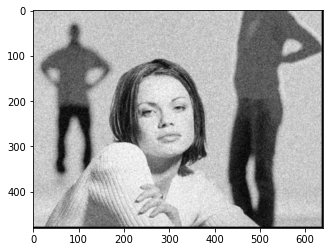

In [25]:
# ごま塩ノイズ画像をコピーして，画像の高さ・幅を取得
img = img2.copy()
height, width = img.shape

# ガウシアンフィルタの作成
kernel_size = 3
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [ 1/8,  1/4, 1/8],
                            [1/16, 1/8, 1/16]])

# フィルタ処理後の値を保存するための配列を準備
img_gaussian = np.zeros(img.shape, dtype=np.uint8)

# カーネルサイズに合わせてフィルタ処理する画像範囲を計算
height = height - kernel_size
width = width - kernel_size

# フィルタ処理
for i in range(height):
    for j in range(width):
        # フィルタ処理を行う範囲の画素値を取得
        image_values = img[i:i+kernel_size, j:j+kernel_size]
        # 画素値とフィルタを掛け合わせて合計する
        filtered_value = np.sum(image_values * gaussian_kernel)
        # フィルタ処理した結果の値を対応箇所に代入
        img_gaussian[i, j] = int(filtered_value)

# 結果の表示
plt.imshow(img_gaussian, cmap="gray")

### メディアンフィルタ

メディアンフィルタは近傍中の画素値をソーティング（並び替え）し，その中央値を計算するフィルタ処理である．
メディアンフィルタは外れ値の影響を受けにくく，スパイクノイズのようなノイズ除去を行うのに有効なフィルタ処理である．

まず，メディアンフィルタのサイズを指定する．
その後，中央値を取得するための配列のインデックスを計算する．
今回は5x5のフィルタサイズを用いるため，25個の画素値を取得してその中央値を計算する．
そのため，`median_index`は13となる．

フィルタ処理では，上で説明したフィルタ処理と同様にfor文で近傍領域を一つづつ求め，中央値を計算する．

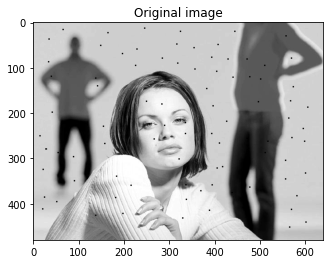

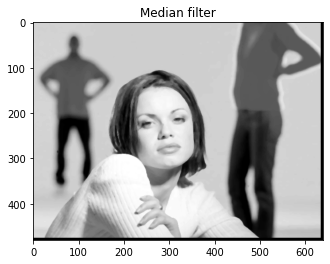

In [26]:
# スパイクノイズ画像をコピーして，画像の高さ・幅を取得
img = img3.copy()
height, width = img.shape

# フィルタサイズを指定
kernel_size = 5

# 中央値を取得するための配列のインデックスを計算
median_index = int((kernel_size**2 - 1) / 2)

# フィルタ処理後の値を保存するための配列を準備
img_median = np.zeros(img.shape, dtype=np.uint8)

# カーネルサイズに合わせてフィルタ処理する画像範囲を計算
height = height - kernel_size
width = width - kernel_size

# フィルタ処理
for i in range(height):
    for j in range(width):
        # フィルタ処理を行う範囲の画素値を取得
        image_values = img[i:i+kernel_size, j:j+kernel_size]
        # 取得した画素値を昇順にソート
        sorted_values = np.sort(image_values.ravel())
        # 中央値を対応する箇所に代入
        img_median[i, j] = sorted_values[median_index]

# 結果の表示
plt.imshow(img3, cmap="gray")
plt.title('Original image')
plt.show()
plt.imshow(img_median, cmap="gray")
plt.title('Median filter')
plt.show()

### OpenCVを用いたフィルタ処理

上記のフィルタ処理は，OpenCVを利用することで次のように処理を行うことができる．



#### filter2Dを用いた方法

OpenCVの`filter2D`関数は，自ら作成したフィルタを用いてフィルタ処理を行うための関数である．

まず，フィルタをNumpy配列で作成する．
その後，作成したフィルタを用いて`filter2D`関数を適用することで，フィルタ処理を行う．
第1引数および第3引数はそれぞれ，フィルタ処理を施す画像とフィルタである．
第2引数はフィルタ処理を施した後の配列データのビット深度を指定するものであるが，詳細については割愛する．

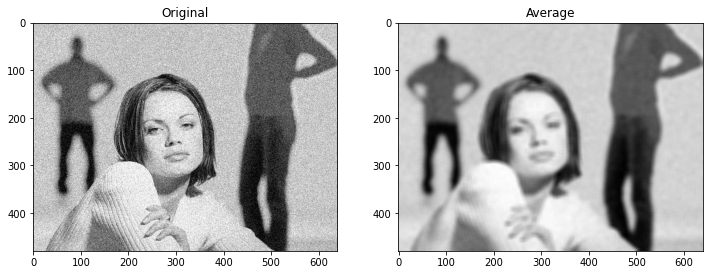

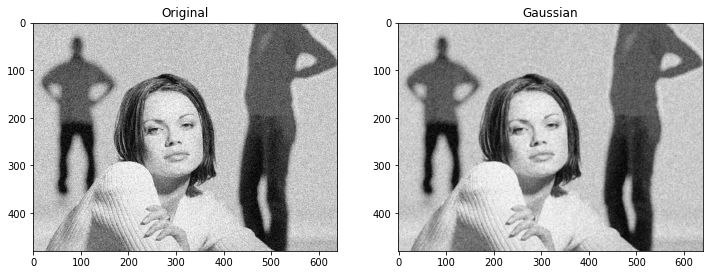

In [9]:
# 移動平均フィルタを作成
ma_kernel = np.ones((11, 11), dtype=np.float32) / 121

# ガウシアンフィルタを作成
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [ 1/8,  1/4, 1/8],
                            [1/16, 1/8, 1/16]])

# フィルタ処理
image_ma = cv2.filter2D(img2, -1, ma_kernel)
image_gaussian = cv2.filter2D(img2, -1, gaussian_kernel)


# 画像の表示（移動平均フィルタ）
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(img2, cmap="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(image_ma, cmap="gray"),plt.title('Average')
plt.show()

# 画像の表示（ガウシアンフィルタ）
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(img2, cmap="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(image_gaussian, cmap="gray"),plt.title('Gaussian')
plt.show()

#### ガウシアン・メディアンフィルタ専用の関数

OpenCVにはガウシアンフィルタとメディアンフィルタを実行する専用の関数が存在する．

`GaussianBlur`はガウシアンフィルタを行うための関数である．
第1引数はフィルタ処理を適用する画像，第2引数はガウシアンフィルタのサイズ，第3引数はフィルタの要素を計算する際の標準偏差である．`sigmaX`は0を指定した場合，フィルタサイズから自動的に決定される．




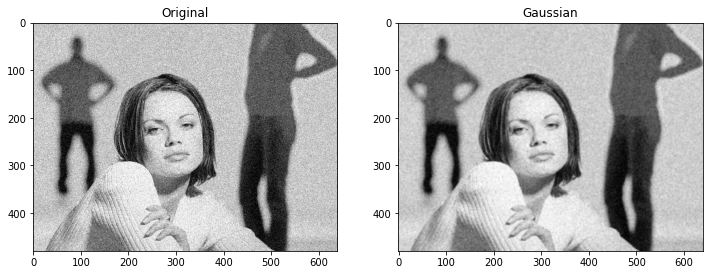

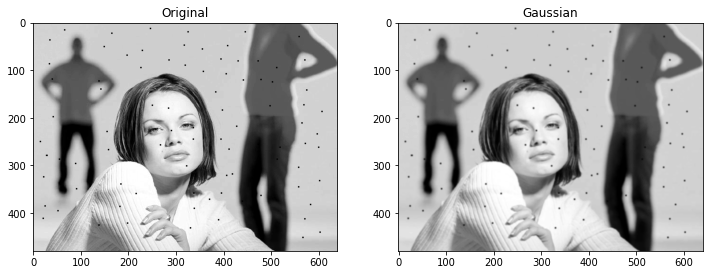

In [27]:
# ガウシアンフィルタ ######################
gaussian1 = cv2.GaussianBlur(img2, ksize=(5, 5), sigmaX=0)
gaussian2 = cv2.GaussianBlur(img3, ksize=(5, 5), sigmaX=0)

# 画像の表示（ごま塩ノイズ画像）
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(img2, cmap="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(gaussian1, cmap="gray"),plt.title('Gaussian')
plt.show()

# 画像の表示（ごま塩ノイズ画像）
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(img3, cmap="gray"),plt.title('Original')
plt.subplot(122),plt.imshow(gaussian2, cmap="gray"),plt.title('Gaussian')
plt.show()

`medianBlur`はメディアンフィルタを行うための関数である．
第1引数はフィルタ処理を適用する画像，第2引数はガウシアンフィルタのサイズである．



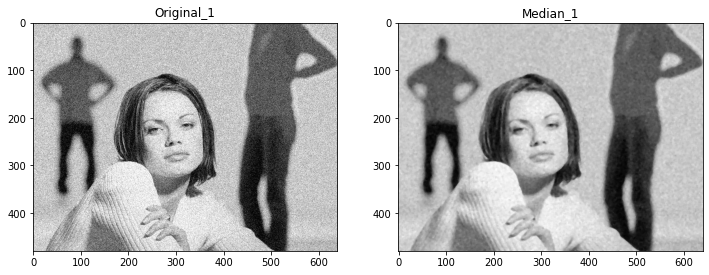

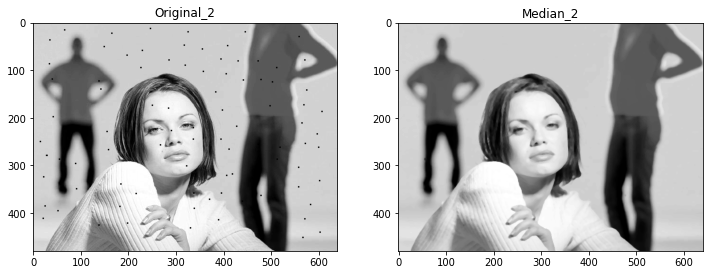

In [28]:
# メディアンフィルタ ######################
median1 = cv2.medianBlur(img2, 5)
median2 = cv2.medianBlur(img3, 5)

# 画像の表示（ごま塩ノイズ画像）
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(img2, cmap="gray"),plt.title('Original_1')
plt.subplot(122),plt.imshow(median1, cmap="gray"),plt.title('Median_1')
plt.show()

# 画像の表示（ごま塩ノイズ画像）
plt.figure(figsize=(12, 5))
plt.subplot(121),plt.imshow(img3, cmap="gray"),plt.title('Original_2')
plt.subplot(122),plt.imshow(median2, cmap="gray"),plt.title('Median_2')
plt.show()

## 画像のエッジ抽出

いくつかのフィルタを用いて画像からエッジ抽出を行う．

### 微分フィルタ

微分フィルタでは画像の微分を計算することでエッジ部分を抽出するフィルタ処理である．

ディジタル画像における微分は隣り合う画素の差となる．
そのため，微分フィルタでは縦方向，横方向それぞれの隣り合う画素の差を計算することでエッジの抽出を実現する．

フィルタ処理によって計算されたエッジの値は画素値の大小関係に応じて，正または負の値を取る．
抽出したエッジをみやすくするために，`np.abs`関数でエッジの絶対値をしてから表示を行なっている．

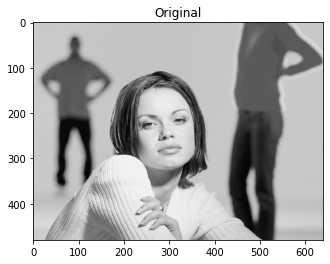

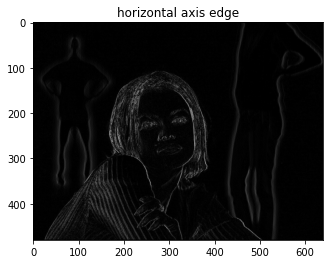

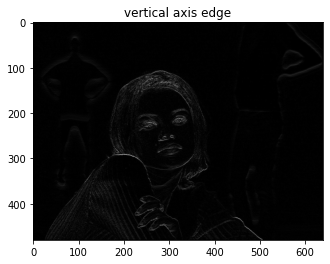

In [12]:
img = img1.copy()
height, width = img.shape

height = height - 1
width = width - 1

img_edge_x = np.zeros(img.shape, dtype=np.float32)
img_edge_y = np.zeros(img.shape, dtype=np.float32)

for i in range(height):
    for j in range(width):
        # 横方向の微分
        img_edge_x[i, j] = int(img[i][j+1]) - int(img[i][j])
        # 縦方向の微分
        img_edge_y[i, j] = int(img[i+1][j]) - int(img[i][j])

plt.imshow(img, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(np.abs(img_edge_x), cmap="gray")
plt.title("horizontal axis edge")
plt.show()
plt.imshow(np.abs(img_edge_y), cmap="gray")
plt.title("vertical axis edge")
plt.show()

### プリューウィットフィルタ

プリューウィットフィルタ (Prewitt filter) は，微分フィルタに平滑化フィルタを掛け合わせたフィルタ処理である．
平滑化フィルタを併用することで，ノイズを抑えながらエッジを抽出することができる．

以下では，水平・垂直方向のエッジを計算するためのフィルタを用意し，OpenCVの`filter2D`を用いてフィルタ処理を行うことで，エッジの抽出を行う．


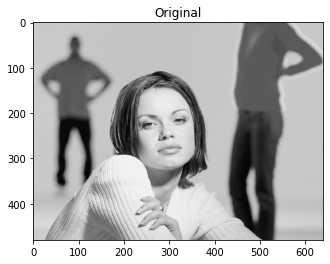

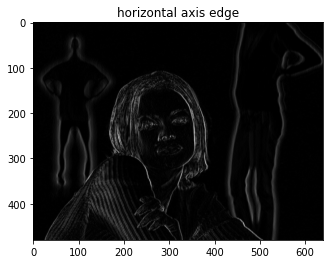

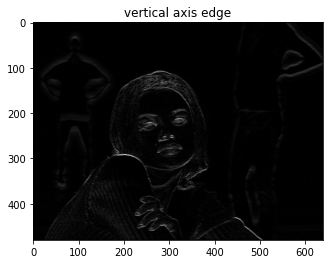

In [13]:
img = img1.copy()
height, width = img.shape

prewitt_filter_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]]) / 6
prewitt_filter_y = np.array([[-1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]]) / 6

img_prewitt_x = cv2.filter2D(img, cv2.CV_32F, prewitt_filter_x)
img_prewitt_y = cv2.filter2D(img, cv2.CV_32F, prewitt_filter_y)

plt.imshow(img, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(np.abs(img_prewitt_x), cmap="gray")
plt.title("horizontal axis edge")
plt.show()
plt.imshow(np.abs(img_prewitt_y), cmap="gray")
plt.title("vertical axis edge")
plt.show()

### ソーベルフィルタ

ソーベルフィルタ (Sobel filter) は，フィルタの中央に重み付けをしたフィルタである．

プリューウィットフィルタと同様に水平・垂直方向のエッジを計算するためのフィルタを用意し．`filter2D`関数を用いてフィルタ処理を行うことで，エッジの抽出を行う．

また，OpenCVではソーベルフィルタを計算するための関数が存在しており，`Sobel`関数を使用することで，同様にエッジを抽出することが可能である．
ここでは，`Sobel`関数の詳細については割愛する．

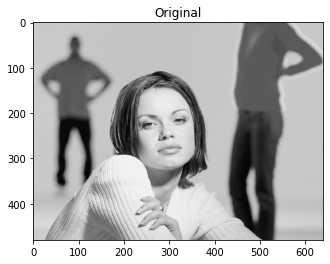

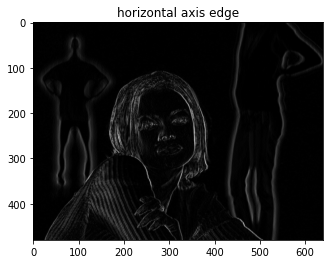

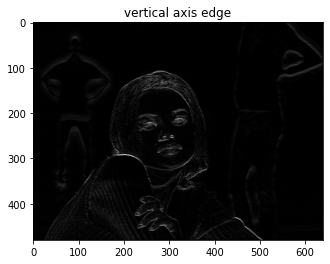

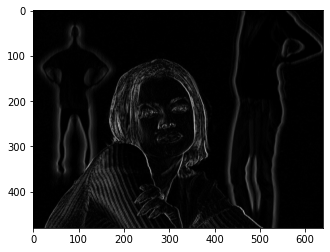

In [29]:
img = img1.copy()
height, width = img.shape

sobel_filter_x = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]]) / 8
sobel_filter_y = np.array([[-1, -2, -1],
                           [ 0,  0,  0],
                           [ 1,  2,  1]]) / 8

img_sobel_x = cv2.filter2D(img, cv2.CV_32F, sobel_filter_x)
img_sobel_y = cv2.filter2D(img, cv2.CV_32F, sobel_filter_y)

plt.imshow(img, cmap="gray")
plt.title("Original")
plt.show()
plt.imshow(np.abs(img_sobel_x), cmap="gray")
plt.title("horizontal axis edge")
plt.show()
plt.imshow(np.abs(img_sobel_y), cmap="gray")
plt.title("vertical axis edge")
plt.show()

# OpenCVの関数を用いた方法
img_sobel = cv2.Sobel(img1, cv2.CV_32F, 1, 0, ksize=3)
plt.imshow(np.abs(img_sobel), cmap="gray")
plt.show()

### ラプラシアンフィルタ

ラプラシアンフィルタは前述の1階微分フィルタとは異なり，画像の2階微分を計算するためのフィルタ処理である．

以下では，水平・垂直方向の2階微分を同時に計算するためのフィルタ（`laplacian_filter`）を用意し．`filter2D`関数を適用することで，画像のエッジを抽出する．

ソーベルフィルタの場合と同様に，OpenCVではラプラシアンフィルタを計算するための関数が存在しており，`Laplacian`関数を使用することで，同様にエッジを抽出することが可能である．
ここでは，`Laplacian`関数の詳細については割愛する．

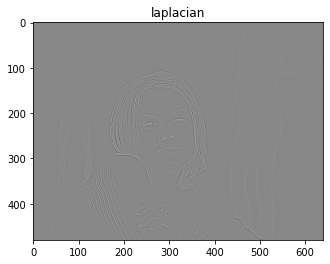

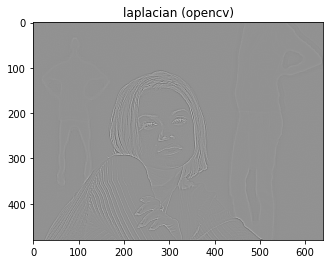

In [15]:
img = img1.copy()
height, width = img.shape

laplacian_filter = np.array([[0,  1, 0],
                             [1, -4, 1],
                             [0,  1, 0]]) / 8

img_lap = cv2.filter2D(img, cv2.CV_32F, laplacian_filter)

plt.imshow(img_lap, cmap="gray")
plt.title("laplacian")
plt.show()

# OpenCVの関数を用いた方法
img_lap2 = cv2.Laplacian(img, cv2.CV_32F,ksize=3)
plt.imshow(img_lap2, cmap="gray")
plt.title("laplacian (opencv)")
plt.show()

### 鮮鋭化

上のラプラシアンフィルタで抽出したエッジを用いて，画像の先鋭化を行う．

先鋭化したい画像の画素値から，ラプラシアンフィルタで抽出したエッジを減算することで，元の画像の濃淡を残したままエッジ部分を強調する．


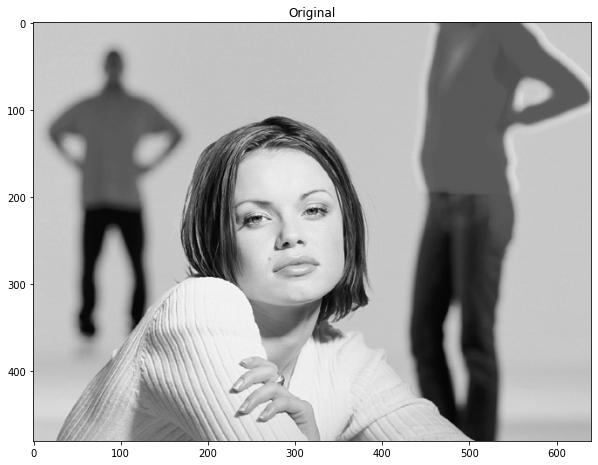

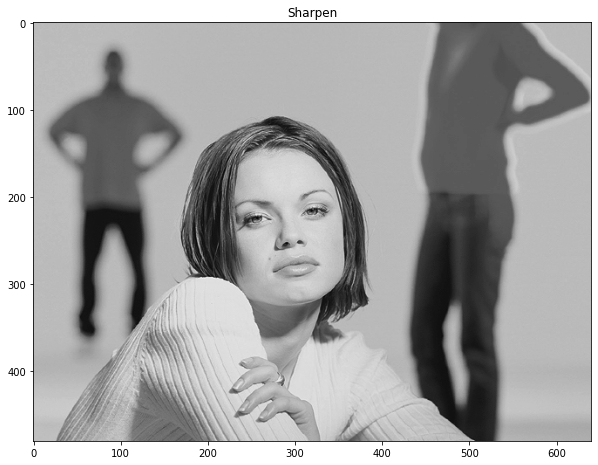

In [16]:
img = img1.copy()
img = img.astype(np.float32)

img_sharpen = img - 1 * img_lap

plt.figure(figsize=(10, 8))
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(img_sharpen, cmap="gray")
plt.title("Sharpen")
plt.show()

より詳しく画素値の変化を確認するために．
画像のとある1行の画素値をグラフにプロットする．

以下では，350行目の画素値をプロットしている．
この結果より，鮮鋭化により山や谷のような画素値の変化が大きな箇所の変化がより強調されていることが確認できる．

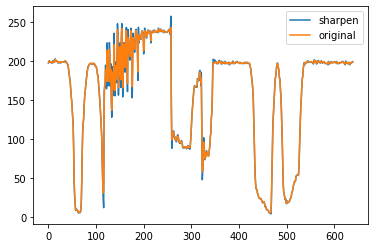

In [17]:
y = 350

plt.plot(img_sharpen[y], label="sharpen")
plt.plot(img[y], label="original")
plt.legend()
plt.show()

## 課題

* 平滑化について，プログラムのkernelの値を変更すると画像はどのようになるか確認すること
* ノイズを付与された画像からノイズを除去するには，どのフィルタを使うと効果的であるか，理由ととも考察すること

